In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

Reading the data from the csv file and representing in the form of tabular form by assigning appropriate names

In [2]:
fileread = pd.read_csv("all.csv", header=None, names = ["rating", "numberofReviews", "id", "bookType", "authorUrl"
                                                       , "publishedYear", "genreTypeUrl", "dir", "numberOfRatings", "bookName"])
fileread.head()

,rating,numberofReviews,id,bookType,authorUrl,publishedYear,genreTypeUrl,dir,numberOfRatings,bookName
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


finding the types of coloums in the file that is loaded

In [3]:
fileread.dtypes

rating             float64
numberofReviews     object
id                  object
bookType            object
authorUrl           object
publishedYear      float64
genreTypeUrl        object
dir                 object
numberOfRatings     object
bookName            object
dtype: object

finding the coloumn names that are assigned at the start

In [4]:
fileread.columns

Index(['rating', 'numberofReviews', 'id', 'bookType', 'authorUrl', 'publishedYear', 'genreTypeUrl', 'dir', 'numberOfRatings', 'bookName'], dtype='object')

In [5]:
fileread.shape
#finding the number of rows and colomns in csv file

(6000, 10)

In [6]:
fileread.shape[0]
#just finding the rows

6000

In [7]:
fileread.shape[1]
#just finding the colomns

10

In [8]:
#pandas will consider the whole file that is read as data frame and each column as series
type(fileread)

pandas.core.frame.DataFrame

In [9]:
type(fileread.rating)

pandas.core.series.Series

In [10]:
#Finding out the entries in csv file below the rating of 4
fileread.rating < 4
#will return the boolean values

0       False
1       False
2        True
3       False
4       False
        ...  
5995    False
5996     True
5997     True
5998     True
5999    False
Name: rating, Length: 6000, dtype: bool

In [11]:
#finding out the actual number of entries that are less than 4
np.sum(fileread.rating<4)


2538

In [12]:
#there are 2538 entries below rating 4. This is because true will take value as 1 and false as 0. After addig all the trues
#will get 2538
 #Finding the mean for this entries
np.sum(fileread.rating<4)/fileread.shape[0]

0.423

In [13]:
#else we can also write as 
np.mean(fileread.rating<4)

0.423

In [14]:
#can be also
(fileread.rating<4).mean()

0.423

Filtering the table according to the conditions

In [15]:
#Conditions can be written as
#1.
fileread.query("rating<3.9")

,rating,numberofReviews,id,bookType,authorUrl,publishedYear,genreTypeUrl,dir,numberOfRatings,bookName
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
8,3.79,20670,0452284244,good_reads:book,https://www.goodreads.com/author/show/3706.Geo...,1945.0,/genres/classics|/genres/fiction|/genres/scien...,dir01/7613.Animal_Farm.html,1364879,Animal Farm
11,3.72,34959,0307277674,good_reads:book,https://www.goodreads.com/author/show/630.Dan_...,2003.0,/genres/mystery|/genres/thriller|/genres/suspe...,dir01/968.The_Da_Vinci_Code.html,1220657,"The Da Vinci Code (Robert Langdon, #2)"
14,3.72,10156,0743477111,good_reads:book,https://www.goodreads.com/author/show/947.Will...,1597.0,/genres/classics|/genres/plays|/genres/fiction...,dir01/18135.Romeo_and_Juliet.html,1211146,Romeo and Juliet
18,3.60,18039,0140283331,good_reads:book,https://www.goodreads.com/author/show/306.Will...,1954.0,/genres/classics|/genres/academic|/genres/scho...,dir01/7624.Lord_of_the_Flies.html,1232126,Lord of the Flies
24,3.75,36955,0061122416,good_reads:book,https://www.goodreads.com/author/show/566.Paul...,1988.0,/genres/fiction|/genres/classics|/genres/fanta...,dir01/865.The_Alchemist.html,876518,The Alchemist
27,3.79,15833,0142000671,good_reads:book,https://www.goodreads.com/author/show/585.John...,1937.0,/genres/fiction|/genres/classics|/genres/acade...,dir01/890.Of_Mice_and_Men.html,1070755,Of Mice and Men
36,3.78,9056,0142437174,good_reads:book,https://www.goodreads.com/author/show/1244.Mar...,1884.0,/genres/classics|/genres/fiction|/genres/young...,dir01/2956.The_Adventures_of_Huckleberry_Finn....,824146,The Adventures of Huckleberry Finn
37,3.72,31131,0316166685,good_reads:book,https://www.goodreads.com/author/show/316.Alic...,2002.0,/genres/fiction|/genres/mystery|/genres/young-...,dir01/12232938-the-lovely-bones.html,1190963,The Lovely Bones
42,3.79,18287,0393978893,good_reads:book,https://www.goodreads.com/author/show/4191.Emi...,1847.0,/genres/classics|/genres/romance|/genres/liter...,dir01/6185.Wuthering_Heights.html,685269,Wuthering Heights


In [16]:
#2.
fileread[fileread.rating<3.9]

,rating,numberofReviews,id,bookType,authorUrl,publishedYear,genreTypeUrl,dir,numberOfRatings,bookName
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
8,3.79,20670,0452284244,good_reads:book,https://www.goodreads.com/author/show/3706.Geo...,1945.0,/genres/classics|/genres/fiction|/genres/scien...,dir01/7613.Animal_Farm.html,1364879,Animal Farm
11,3.72,34959,0307277674,good_reads:book,https://www.goodreads.com/author/show/630.Dan_...,2003.0,/genres/mystery|/genres/thriller|/genres/suspe...,dir01/968.The_Da_Vinci_Code.html,1220657,"The Da Vinci Code (Robert Langdon, #2)"
14,3.72,10156,0743477111,good_reads:book,https://www.goodreads.com/author/show/947.Will...,1597.0,/genres/classics|/genres/plays|/genres/fiction...,dir01/18135.Romeo_and_Juliet.html,1211146,Romeo and Juliet
18,3.60,18039,0140283331,good_reads:book,https://www.goodreads.com/author/show/306.Will...,1954.0,/genres/classics|/genres/academic|/genres/scho...,dir01/7624.Lord_of_the_Flies.html,1232126,Lord of the Flies
24,3.75,36955,0061122416,good_reads:book,https://www.goodreads.com/author/show/566.Paul...,1988.0,/genres/fiction|/genres/classics|/genres/fanta...,dir01/865.The_Alchemist.html,876518,The Alchemist
27,3.79,15833,0142000671,good_reads:book,https://www.goodreads.com/author/show/585.John...,1937.0,/genres/fiction|/genres/classics|/genres/acade...,dir01/890.Of_Mice_and_Men.html,1070755,Of Mice and Men
36,3.78,9056,0142437174,good_reads:book,https://www.goodreads.com/author/show/1244.Mar...,1884.0,/genres/classics|/genres/fiction|/genres/young...,dir01/2956.The_Adventures_of_Huckleberry_Finn....,824146,The Adventures of Huckleberry Finn
37,3.72,31131,0316166685,good_reads:book,https://www.goodreads.com/author/show/316.Alic...,2002.0,/genres/fiction|/genres/mystery|/genres/young-...,dir01/12232938-the-lovely-bones.html,1190963,The Lovely Bones
42,3.79,18287,0393978893,good_reads:book,https://www.goodreads.com/author/show/4191.Emi...,1847.0,/genres/classics|/genres/romance|/genres/liter...,dir01/6185.Wuthering_Heights.html,685269,Wuthering Heights


In [17]:
#for two or more conditions
#same type must be given to compare else there will be error
fileread[(fileread.rating>3.9) & (fileread.numberOfRatings>10000)]

TypeError: '>' not supported between instances of 'str' and 'int'

In [18]:
#correct one
fileread[(fileread.rating>3.9) & (fileread.publishedYear>1980)]

,rating,numberofReviews,id,bookType,authorUrl,publishedYear,genreTypeUrl,dir,numberOfRatings,bookName
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
10,4.03,20937,0739326228,good_reads:book,https://www.goodreads.com/author/show/614.Arth...,1997.0,/genres/fiction|/genres/historical-fiction|/ge...,dir01/930.Memoirs_of_a_Geisha.html,1042679,Memoirs of a Geisha
12,4.36,69524,0375831002,good_reads:book,https://www.goodreads.com/author/show/11466.Ma...,2005.0,/genres/historical-fiction|/genres/young-adult...,dir01/19063.The_Book_Thief.html,675431,The Book Thief
16,3.92,38061,NaN,good_reads:book,https://www.goodreads.com/author/show/498072.A...,2003.0,/genres/fiction|/genres/romance|/genres/fantas...,dir01/18619684-the-time-traveler-s-wife.html,927254,The Time Traveler's Wife
19,4.28,30815,0812550706,good_reads:book,https://www.goodreads.com/author/show/589.Orso...,1985.0,/genres/science-fiction|/genres/young-adult|/g...,dir01/375802.Ender_s_Game.html,624730,"Ender's Game (The Ender Quintet, #1)"
26,4.43,112279,0525478817,good_reads:book,https://www.goodreads.com/author/show/1406384....,2012.0,/genres/young-adult|/genres/book-club|/genres/...,dir01/11870085-the-fault-in-our-stars.html,1150626,The Fault in Our Stars
32,4.44,70247,0399155341,good_reads:book,https://www.goodreads.com/author/show/1943477....,2009.0,/genres/book-club|/genres/historical-fiction|/...,dir01/4667024-the-help.html,1091909,The Help
38,4.30,33912,1594489505,good_reads:book,https://www.goodreads.com/author/show/569.Khal...,2007.0,/genres/fiction|/genres/historical-fiction|/ge...,dir01/128029.A_Thousand_Splendid_Suns.html,563920,A Thousand Splendid Suns
40,4.05,50663,1565125606,good_reads:book,https://www.goodreads.com/author/show/24556.Sa...,2006.0,/genres/book-club|/genres/contemporary|/genres...,dir01/43641.Water_for_Elephants.html,885435,Water for Elephants


Altering the file

In [19]:
#in csv files there will be null values
fileread[fileread.rating.isnull()]

,rating,numberofReviews,id,bookType,authorUrl,publishedYear,genreTypeUrl,dir,numberOfRatings,bookName
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None


In [20]:
#if null value is present altering of table will be difficult or impposible
fileread['bookType'] = fileread.bookType.astype(int)

ValueError: invalid literal for int() with base 10: 'good_reads:book'

In [45]:
#have to remove the contents that are null for the column that is being altered
fileread = fileread[fileread.publishedYear.notnull()]
fileread = fileread[fileread.numberofReviews.notnull()]

In [46]:
#now the shape will change
fileread.shape

(5993, 10)

In [47]:
#now we can change the datatype of year
fileread['publishedYear'] = fileread.publishedYear.astype(int)
fileread['numberofReviews'] = fileread.numberofReviews.astype(int)

In [48]:
fileread.dtypes

rating             float64
numberofReviews      int32
id                  object
bookType            object
authorUrl           object
publishedYear        int32
genreTypeUrl        object
dir                 object
numberOfRatings     object
bookName            object
dtype: object

Data Exploring 

Some with python

In [49]:
numberList = [1, 2, 3, 4]

In [50]:
squareNumberList = [i*i for i in numberList]
print(squareNumberList)

[1, 4, 9, 16]


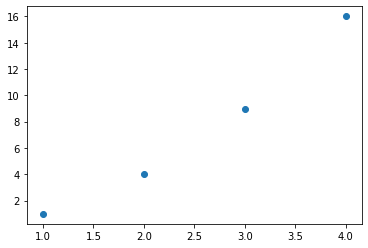

In [51]:
plt.scatter(numberList, squareNumberList)

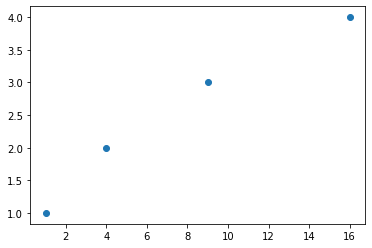

In [52]:
plt.scatter(squareNumberList, numberList);

In [53]:
#to know what is the type of numberList or squareNumberList
type(numberList)

list

In [54]:
type(squareNumberList)

list

Vectorization

In [55]:
#can merge two lists
numberList + numberList

[1, 2, 3, 4, 1, 2, 3, 4]

In [56]:
#for adding two arrays
np.array(numberList)
np.array(numberList) + np.array(numberList)

array([2, 4, 6, 8])

In [57]:
#multiply
np.array(numberList) * np.array(numberList)

array([ 1,  4,  9, 16])

In [58]:
#it is same like for loop
resultList = []
for i in numberList:
    resultList.append(i*i)
resultList

[1, 4, 9, 16]

In [59]:
type(np.array(numberList))

numpy.ndarray

In [60]:
#adding 1 to each element in array
a = np.array(numberList)
a + 2

array([3, 4, 5, 6])

Intrepreting the data visually

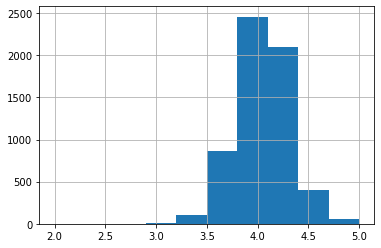

In [61]:
fileread.rating.hist()

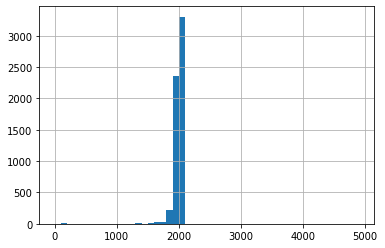

In [64]:
fileread.publishedYear.hist(bins=np.arange(0,5000, 100))

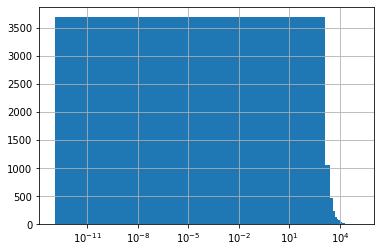

In [66]:
#rescaling the x-axis
fileread.numberofReviews.hist(bins=100)
plt.xscale("log");